In [24]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON data from a file
with open('data3.json', 'r') as file:
    data = json.load(file)

# Extract the user data from the nested JSON structure
users_data = [entry['userData'] for entry in data['testData'].values()]

# Convert to a DataFrame for easier analysis
df = pd.DataFrame(users_data)

# Get a summary of key statistics for numerical columns
statistics_summary = df[['age', 'correctCount', 'incorrectCount']].describe()

print("Statistical Summary of the Data:")
print(statistics_summary)

# Convert necessary columns to numeric for calculations
df['correctCount'] = pd.to_numeric(df['correctCount'])

# Group by 'userColor' and 'correctCount', then count the occurrences
color_correct_distribution = df.groupby(['userColor', 'correctCount']).size().unstack(fill_value=0)

# Display the distribution
print("Distribution of Correct Count Based on User Color:")
print(color_correct_distribution)

Statistical Summary of the Data:
       correctCount  incorrectCount
count     60.000000       60.000000
mean      13.383333        3.883333
std        4.278807        4.326080
min        4.000000        0.000000
25%       10.000000        0.000000
50%       14.000000        2.500000
75%       17.000000        6.250000
max       20.000000       16.000000
Distribution of Correct Count Based on User Color:
correctCount  4   5   7   8   9   10  11  12  13  14  15  16  17  18  19  20
userColor                                                                   
black          0   2   1   2   2   2   1   1   1   4   1   1   1   3   2   2
blue           0   0   1   0   0   0   1   3   0   3   0   0   2   1   1   2
green          1   0   0   0   1   1   0   0   1   1   0   0   1   1   0   0
orange         0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
pink           0   0   0   1   0   0   1   0   0   0   1   0   0   0   0   1
purple         0   0   0   0   1   0   1   0   1   0 

In [25]:


# Separate black and non-black colors
black_correct_total = df[df['userColor'] == 'black']['correctCount'].sum()
non_black_correct_total = df[df['userColor'] != 'black']['correctCount'].sum()

# Print the results
print(f"Total Correct Count for 'black' color: {black_correct_total}")
print(f"Total Correct Count for all other colors combined: {non_black_correct_total}")

# Comparison
if black_correct_total > non_black_correct_total:
    print("Users with 'black' color have a higher total correct count.")
elif black_correct_total < non_black_correct_total:
    print("Users with colors other than 'black' have a higher total correct count.")
else:
    print("Total correct counts for 'black' and all other colors are equal.")


Total Correct Count for 'black' color: 343
Total Correct Count for all other colors combined: 460
Users with colors other than 'black' have a higher total correct count.


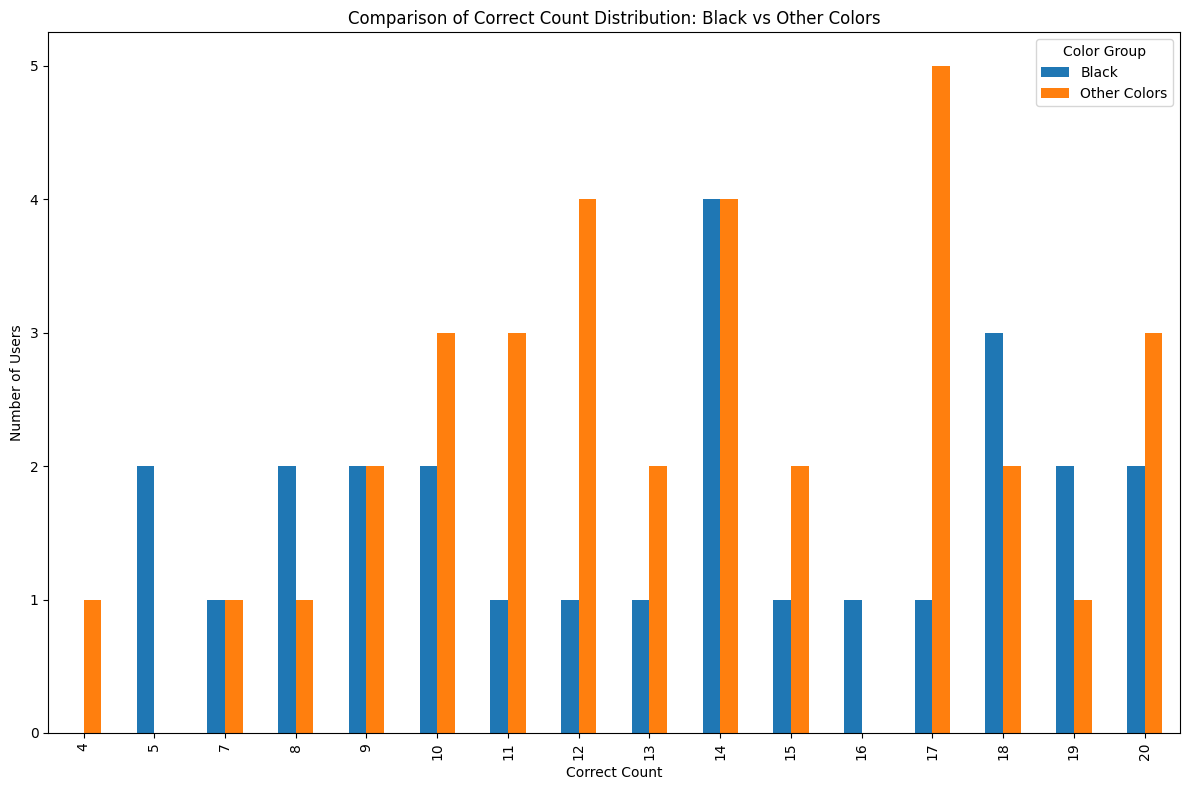

In [26]:
# Group by 'userColor' and 'correctCount', then count the occurrences
color_correct_distribution = df.groupby(['userColor', 'correctCount']).size().unstack(fill_value=0)

# Separate the distribution for 'black' color
black_distribution = color_correct_distribution.loc['black']

# Sum up the distributions of all other colors
other_colors_distribution = color_correct_distribution.drop('black', axis=0).sum()

# Combine into a new DataFrame for comparison
comparison_df = pd.DataFrame({
    'Black': black_distribution,
    'Other Colors': other_colors_distribution
})

# Plot the comparison as a bar chart
comparison_df.plot(kind='bar', figsize=(12, 8))

# Adding title and labels
plt.title('Comparison of Correct Count Distribution: Black vs Other Colors')
plt.xlabel('Correct Count')
plt.ylabel('Number of Users')
plt.legend(title='Color Group')
plt.tight_layout()

plt.show()

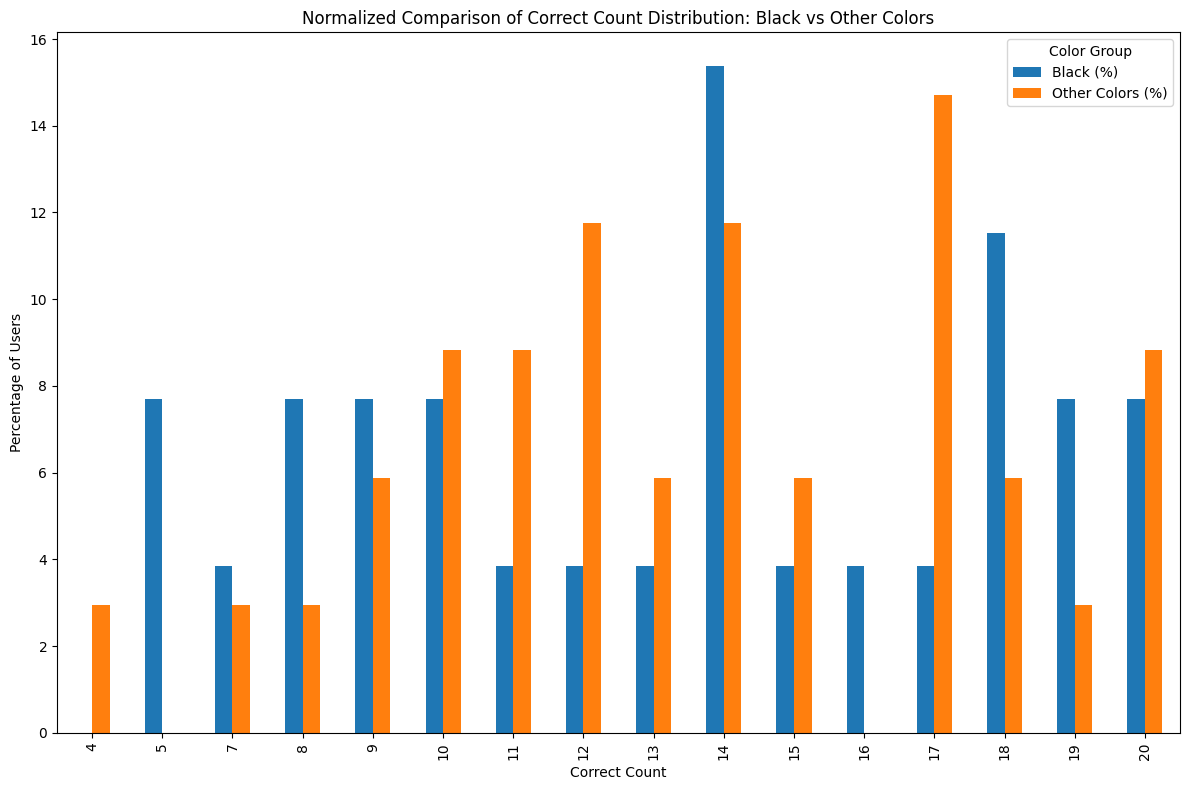

In [27]:
# Normalize each distribution to get percentages
black_distribution_percentage = (black_distribution / black_distribution.sum()) * 100
other_colors_distribution_percentage = (other_colors_distribution / other_colors_distribution.sum()) * 100

# Combine into a new DataFrame for comparison
comparison_df = pd.DataFrame({
    'Black (%)': black_distribution_percentage,
    'Other Colors (%)': other_colors_distribution_percentage
})

# Plot the comparison as a bar chart
comparison_df.plot(kind='bar', figsize=(12, 8))

# Adding title and labels
plt.title('Normalized Comparison of Correct Count Distribution: Black vs Other Colors')
plt.xlabel('Correct Count')
plt.ylabel('Percentage of Users')
plt.legend(title='Color Group')
plt.tight_layout()

plt.show()

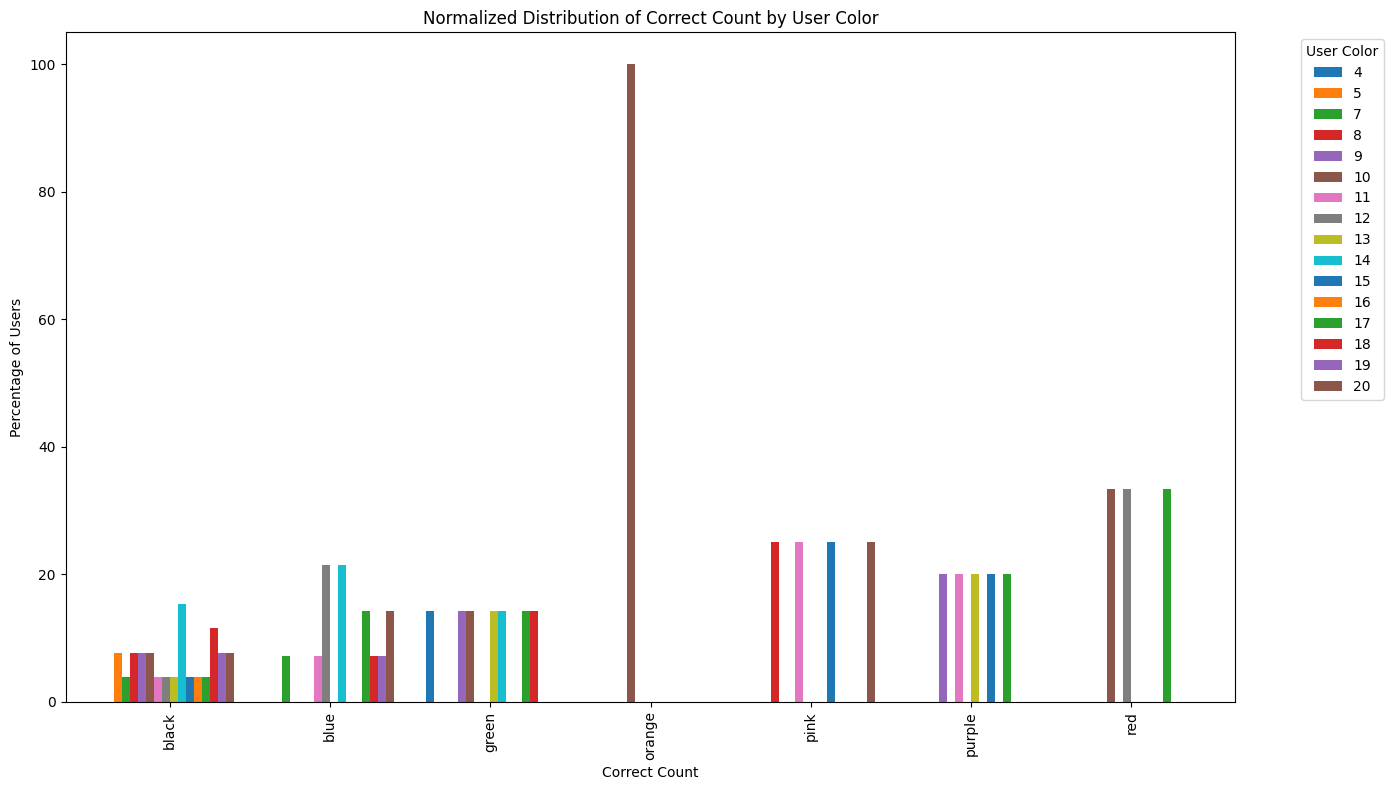

In [28]:
# Normalize each color's distribution to percentage
color_correct_distribution_percentage = color_correct_distribution.div(color_correct_distribution.sum(axis=1), axis=0) * 100

# Plotting the distribution as a grouped bar chart
color_correct_distribution_percentage.plot(kind='bar', figsize=(14, 8), width=0.8)

# Adding title and labels
plt.title('Normalized Distribution of Correct Count by User Color')
plt.xlabel('Correct Count')
plt.ylabel('Percentage of Users')
plt.legend(title='User Color', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

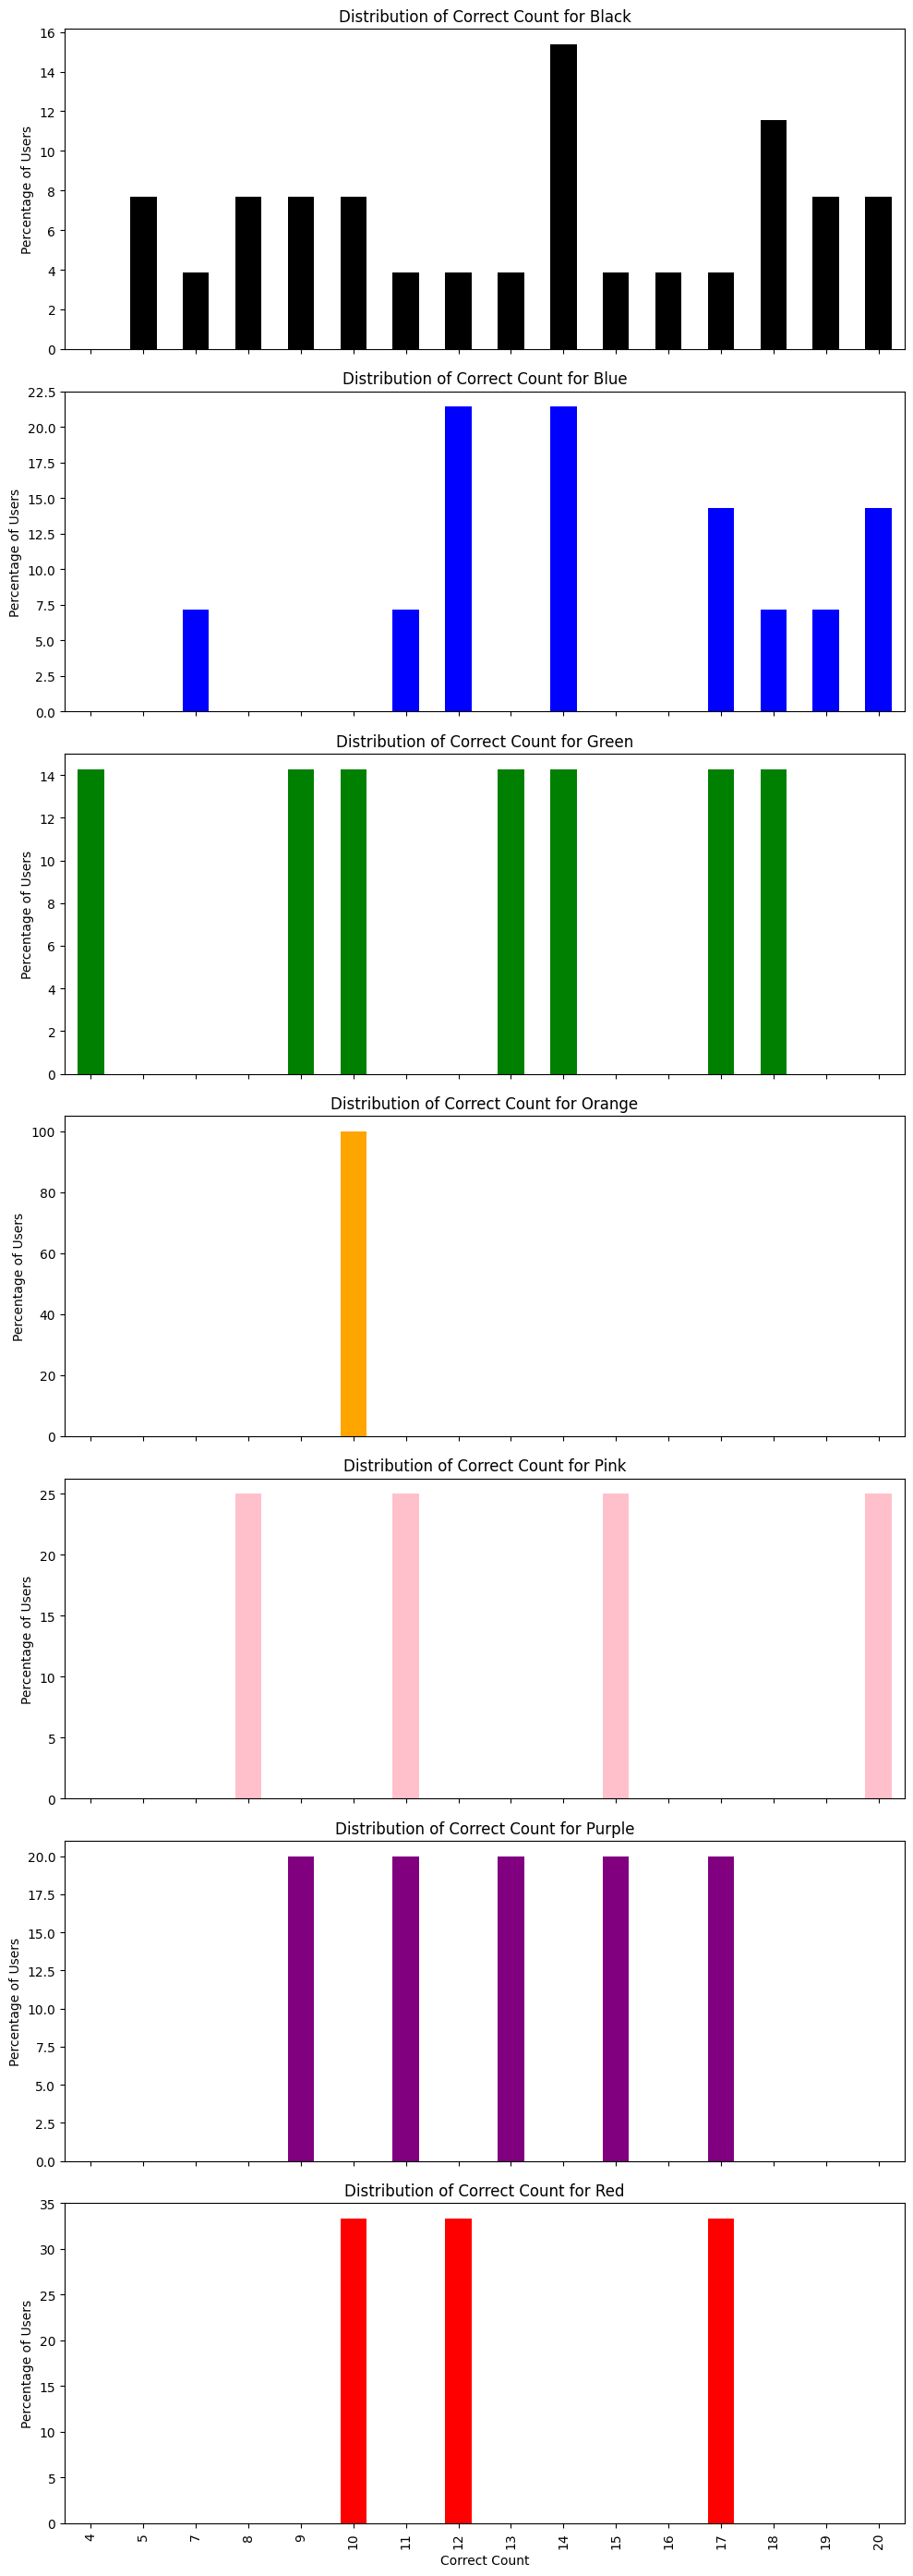

In [29]:
# Group by 'userColor' and 'correctCount', then count the occurrences
color_correct_distribution = df.groupby(['userColor', 'correctCount']).size().unstack(fill_value=0)

# Normalize each color's distribution to percentage
color_correct_distribution_percentage = color_correct_distribution.div(color_correct_distribution.sum(axis=1), axis=0) * 100

# Plotting each color's distribution in separate subplots
colors = color_correct_distribution_percentage.index
fig, axes = plt.subplots(nrows=len(colors), ncols=1, figsize=(10, 4 * len(colors)), sharex=True)

for i, color in enumerate(colors):
    color_correct_distribution_percentage.loc[color].plot(kind='bar', ax=axes[i], color=color)
    axes[i].set_title(f'Distribution of Correct Count for {color.capitalize()}')
    axes[i].set_ylabel('Percentage of Users')
    axes[i].set_xlabel('Correct Count')

plt.tight_layout()
plt.show()